<a href="https://colab.research.google.com/github/FayezAltawafshih/My_Portfolio/blob/main/Customer_Segmentation_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate** **Analysis**

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

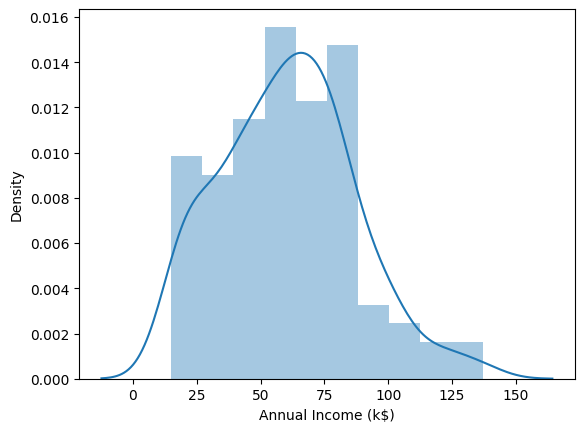

In [8]:
sns.distplot(df['Annual Income (k$)'])

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

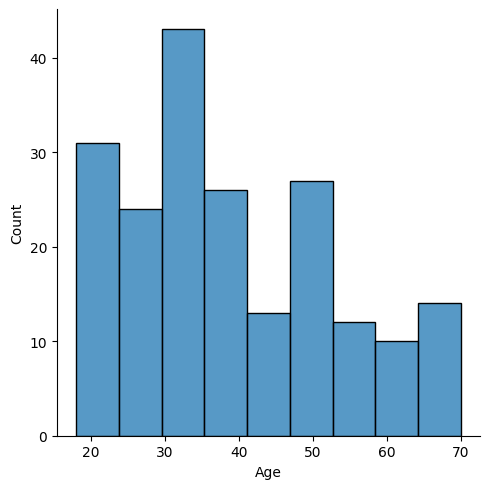

<Figure size 640x480 with 0 Axes>

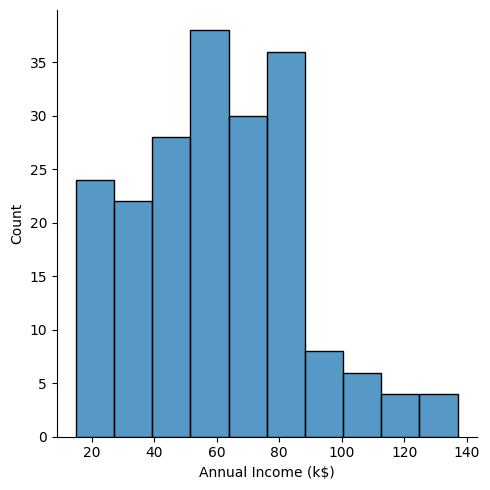

<Figure size 640x480 with 0 Axes>

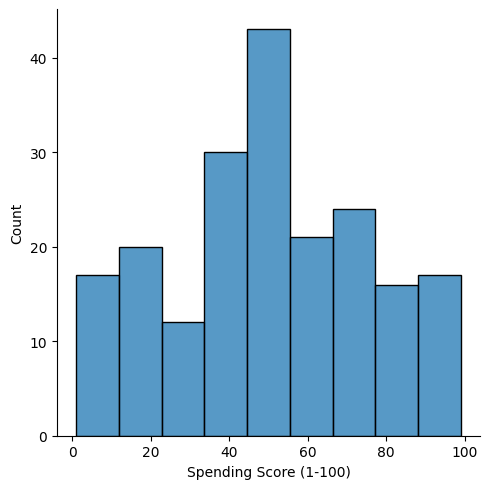

In [10]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.displot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

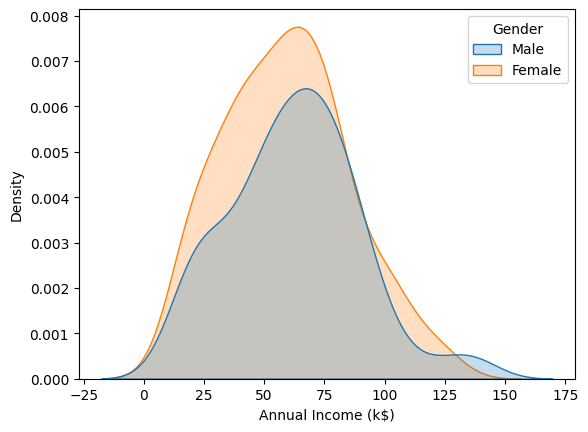

In [11]:
sns.kdeplot(x='Annual Income (k$)', hue='Gender', data=df, shade=True)

<Figure size 640x480 with 0 Axes>

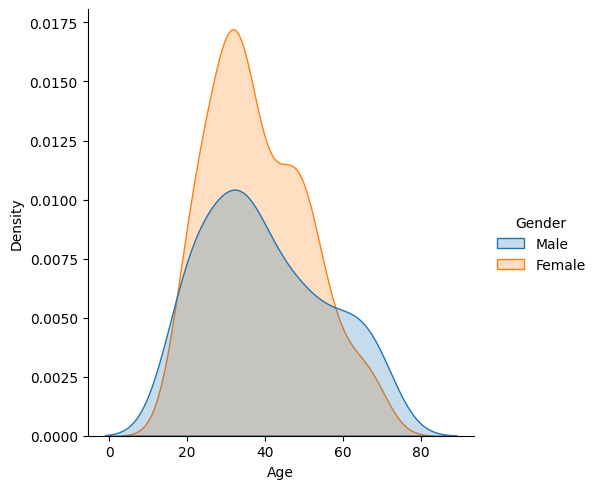

<Figure size 640x480 with 0 Axes>

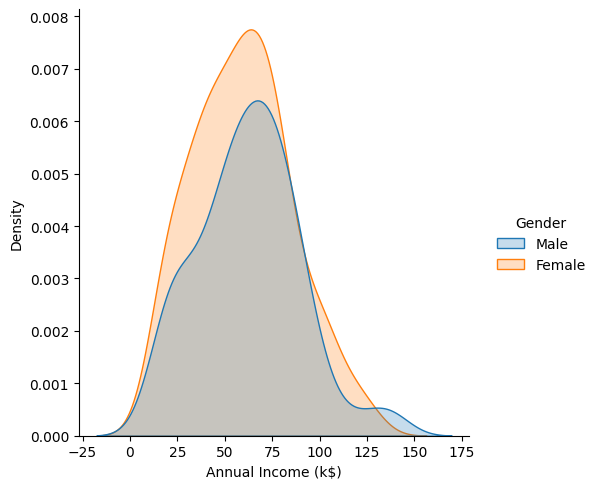

<Figure size 640x480 with 0 Axes>

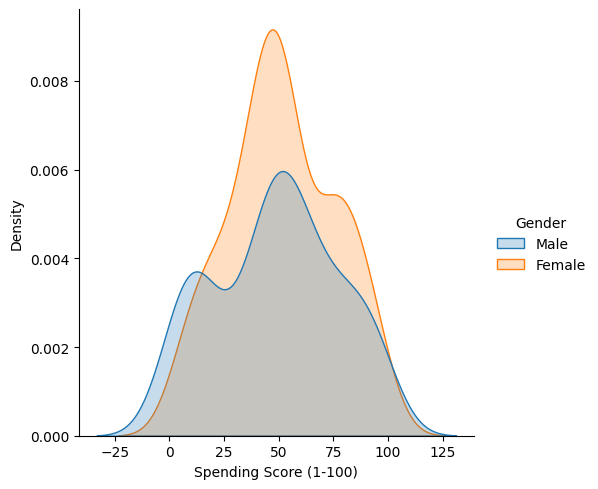

In [12]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  # Use displot for automatic hue handling
  sns.displot(data=df, x=i, hue='Gender', kind='kde', fill=True)
  # Alternatively, specify x and hue for kdeplot
  # sns.kdeplot(data=df, x=i, hue='Gender', shade=True)

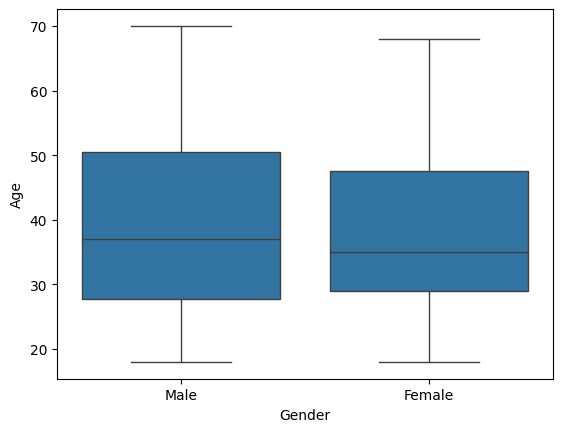

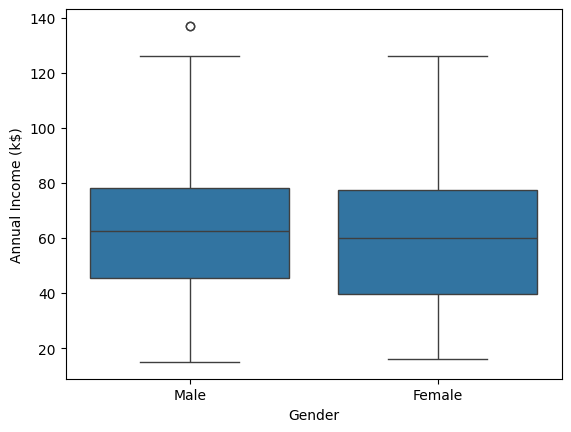

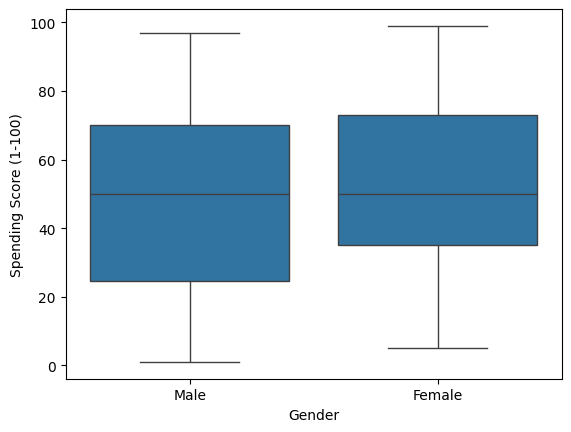

In [13]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data=df,x='Gender',y=df[i])

In [14]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


**Bivariate** **Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

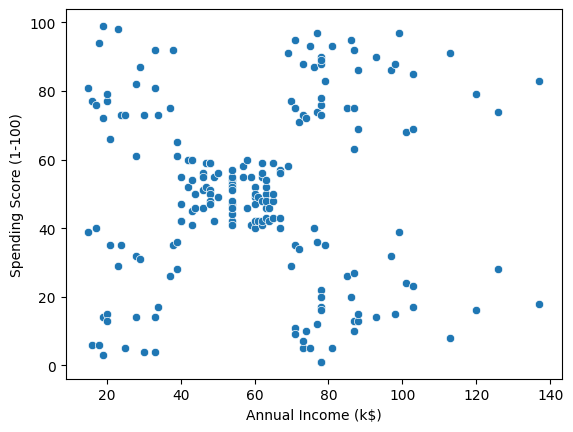

In [15]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

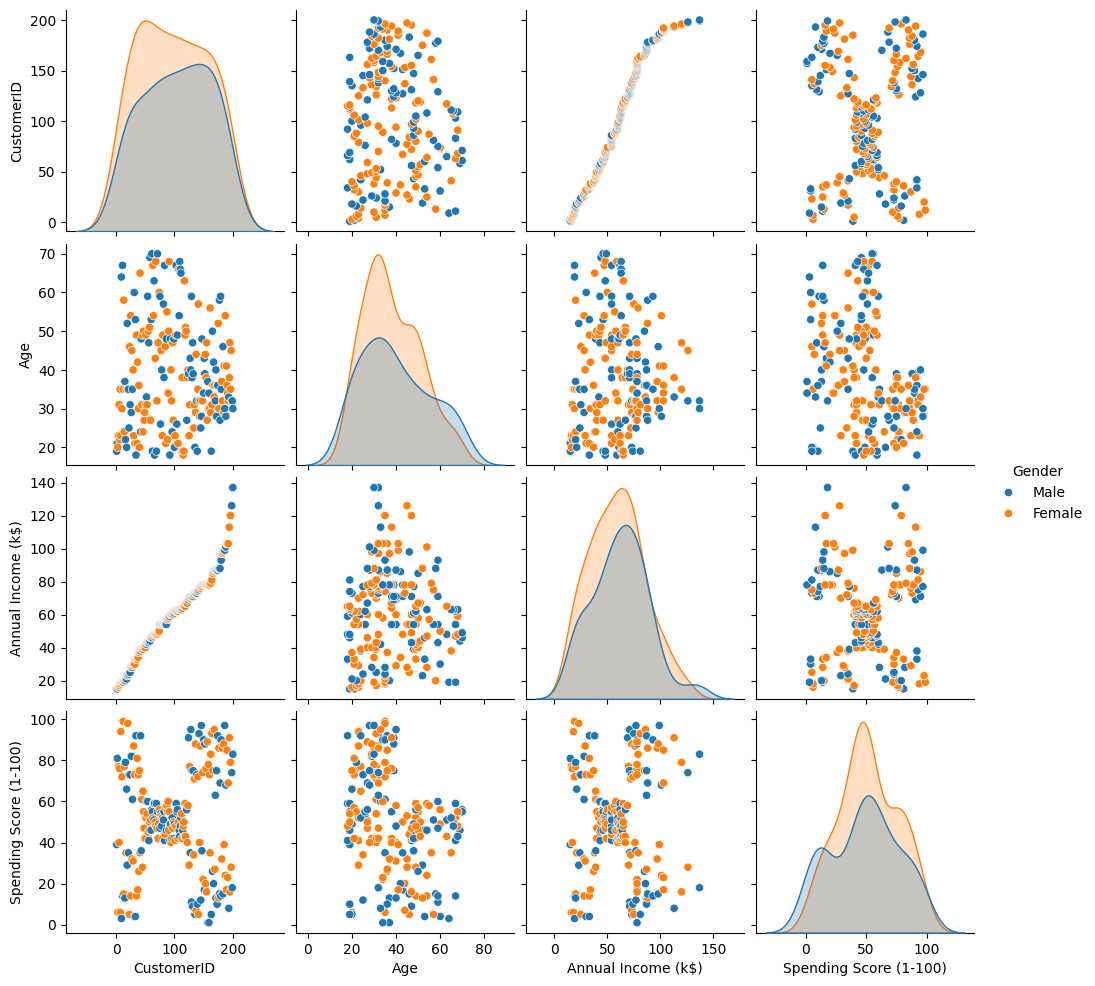

In [16]:
sns.pairplot(df,hue='Gender')

In [17]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<Axes: >

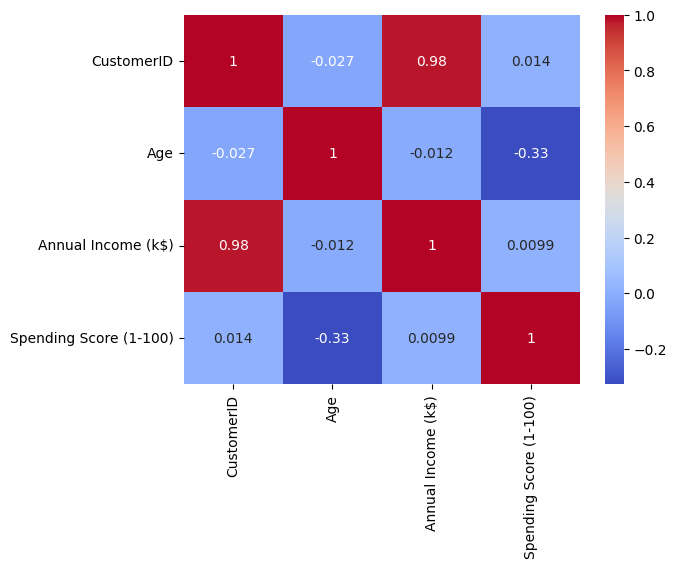

In [21]:

# Assuming 'df' is your DataFrame

# Select only the numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Clustering** - **Univariate** , **Bivariate** , **Multivariate**

In [22]:
clustering1 = KMeans

In [30]:

clustering1 = KMeans(n_clusters=6)  # For example, 5 clusters

# Reshape the 'Annual Income (k$)' column into a 2D array
X = df[['Annual Income (k$)']]  # Use double brackets to create a DataFrame
# or
# X = df['Annual Income (k$)'].values.reshape(-1, 1)  # Reshape using NumPy

# Fit the KMeans model to the data
clustering1.fit(X)

KMeans(n_clusters=6)

In [32]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [33]:
df['cluster'] = clustering1.labels_

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [35]:
df['cluster'].value_counts()

,count
cluster,
0,54
3,50
1,42
2,32
5,14
4,8


In [36]:
clustering1.inertia_

5430.245925925928

In [37]:
intrtia_scores = []
for i in range(1,11):
  clustering1 = KMeans(n_clusters=i)
  clustering1.fit(X)
  intrtia_scores.append(clustering1.inertia_)

In [38]:
intrtia_scores

[137277.2800000002,
 48968.020808323316,
 23517.33093093092,
 15460.429512270892,
 10175.918627450972,
 5134.40362434413,
 3941.41636141636,
 2959.9549062049077,
 2430.9199633699654,
 1762.954112554113]

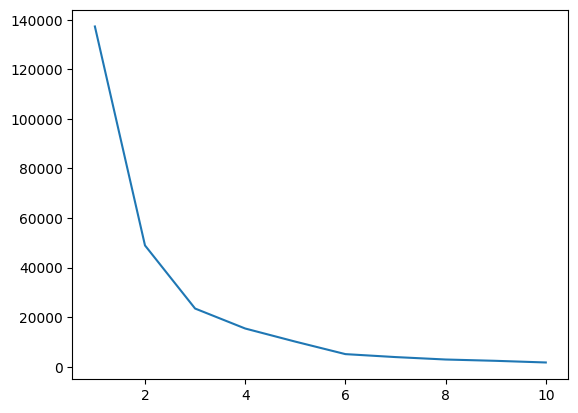

In [39]:
plt.plot(range(1,11),intrtia_scores)

In [40]:
df.groupby(['cluster'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,36.018519,78.370370,49.555556
1,43.000000,42.238095,50.666667
2,34.906250,22.000000,49.656250
3,41.520000,60.440000,50.060000
4,36.500000,124.000000,49.625000
5,38.142857,99.142857,53.357143


**Bivariate** **Clustering**

In [41]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending_cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Spending_cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4


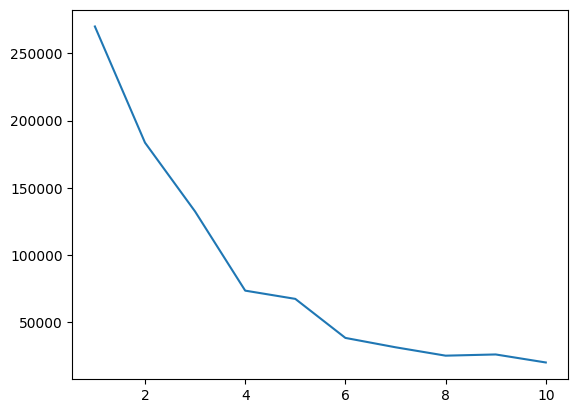

In [43]:
intertia_scores2 =[]
for i in range(1,11):
  clustering2 = KMeans(n_clusters=i)
  clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  # Append the inertia score to the list
  intertia_scores2.append(clustering2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [45]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

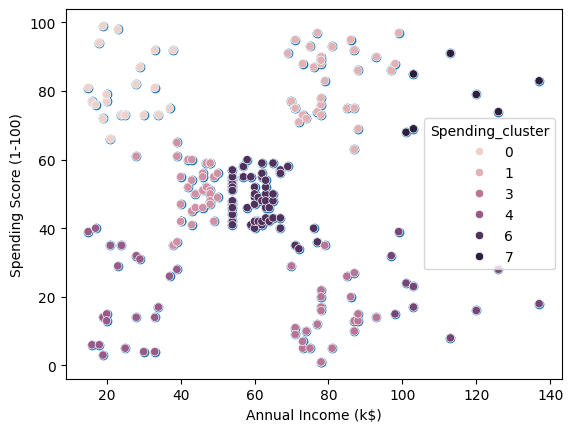

In [47]:
# Corrected function name: 'scatter' instead of 'scatterplt'
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending_cluster')

In [51]:
# Create a new column 'Spending and Income Cluster' based on 'Spending_cluster'
# Assuming 'Spending_cluster' is a relevant column for your analysis
df['Spending and Income Cluster'] = df['Spending_cluster']

# Now, you can create the crosstab
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.600000,0.400000
1,0.531250,0.468750
2,0.606061,0.393939
3,0.375000,0.625000
4,0.619048,0.380952
5,0.700000,0.300000
6,0.566038,0.433962
7,0.571429,0.428571


In [53]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
# Changed the tuple of column names to a list by enclosing them in square brackets []

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,24.850000,24.950000,81.000000
1,32.625000,80.375000,82.937500
2,45.424242,43.969697,51.121212
3,40.875000,79.708333,14.291667
4,44.142857,25.142857,19.523810
5,41.000000,109.700000,22.000000
6,41.150943,61.301887,48.245283
7,33.000000,114.714286,78.428571


In [54]:
#mulivariate clustering
from sklearn.preprocessing import StandardScaler

In [55]:
scale = StandardScaler()

In [56]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Spending_cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4,4
1,2,Male,21,15,81,2,0,0
2,3,Female,20,16,6,2,4,4
3,4,Female,23,16,77,2,0,0
4,5,Female,31,17,40,2,4,4


In [57]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster,Spending_cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,4,4,True
1,2,21,15,81,2,0,0,True
2,3,20,16,6,2,4,4,False
3,4,23,16,77,2,0,0,False
4,5,31,17,40,2,4,4,False


In [58]:
dff.columns


Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster', 'Spending_cluster', 'Spending and Income Cluster',
       'Gender_Male'],
      dtype='object')

In [59]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [60]:
dff = scale.fit_transform(dff)


In [61]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


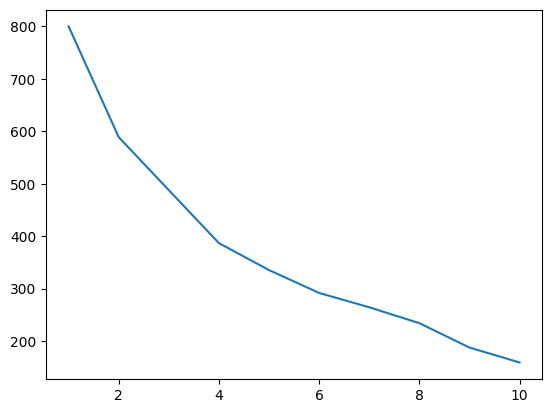

In [62]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [63]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Spending_cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4,4
1,2,Male,21,15,81,2,0,0
2,3,Female,20,16,6,2,4,4
3,4,Female,23,16,77,2,0,0
4,5,Female,31,17,40,2,4,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,7,7
196,197,Female,45,126,28,4,5,5
197,198,Male,32,126,74,4,7,7
198,199,Male,32,137,18,4,5,5


In [64]:
df.to_csv('Clustering.csv')
